This post is adapted from a [lecture](https://github.com/atorin/Dynamics3-Lecture) I gave on multiple degree-of-freedom systems (arrays of masses and springs) and their connection with ideal strings. Here's a brief outline:

## Outline

#### Multiple degree-of-freedom systems
---
- Equations of motion
- Simple example
- Normal modes and frequencies

<!-- TEASER_END -->

# Multiple degree-of-freedom systems

## Mass-spring system with N DOFs

Consider an array of $N$ masses connected by $N+1$ springs, as in the following figure.

![](https://github.com/atorin/Dynamics3-Lecture/raw/master/files/masses.png)

We wish to calculate the equation of motion of the system and do some experiments with it.

## Deriving the equations of motion

A very elegant approach to the solution of this problem is discussed by __Prof. Gilbert Strang__ in one of his classes for the "Computational Science and Engineering I" course, available online at this link:

http://www.courses.com/massachusetts-institute-of-technology/computational-science-and-engineering-i/2

The idea is to start from the individual positions of the masses, link those to the elongations of the springs, which in turn give rise to forces determined by Hooke's law. These can then be related to the total force acting on each mass and eventually to their acceleration. 

Here's a diagram:

$$\vec{u} \rightarrow \vec{e} \rightarrow \vec{f} \rightarrow \vec{F} \rightarrow \ddot{\vec{u}}$$

When all the quantities are expressed as vectors, each arrow in the previous chain can be thought of as a matrix...

In order to make things more concrete, consider 4 masses and 5 springs, but the argument can easily be generalised.

![Array of 4 masses and 5 springs](https://github.com/atorin/Dynamics3-Lecture/raw/master/files/4masses.png)

### 1. Elongations of the springs, $\vec{u} \rightarrow \vec{e}$

![](https://github.com/atorin/Dynamics3-Lecture/raw/master/files/masses_eu.png)

When the first mass moves by $u_1$, the first spring stretches by the same amount: $e_1 = u_1$. 
(Note that if $u_1$ < 0, the "stretch" is negative, and the spring is actually compressed!)

As for the second spring, the elongation $e_2$ can be written as $e_2 = u_2 - u_1$. A similar argument can be used for $k_3$ and $k_4$.

For the last spring, $k_5$, a positive displacement of the mass $m_4$ is associated with a negative elongation of the spring. Hence, $e_5 = -u_4$.

Putting everything in matrix form, one can write:

$$ \vec{e} = \left[\begin{array}{cccc} 1 & 0 & 0 & 0\\ 
-1 & 1 & 0 & 0 \\ 
0 & -1 & 1 & 0 \\
0 & 0 & -1 & 1\\
0 & 0 & 0 & -1\end{array} \right] \vec{u} \equiv A \vec{u}, $$

where the matrix $A$ is rectangular (5x4). 

### 2. Hooke's law, $\vec{e} \rightarrow \vec{f}$

The next step consists in relating the elongations to the forces acting on the masses. This is easily accomplished with the help of Hooke's law: for each elongation $e_j$, a recall force $f_j$ proportional to $e_j$ is generated. Mathematically, 

$$f_j = - k_j e_j, $$

where $k_j$ is the stiffness constant of the $j$-th spring. 


In matrix form, this becomes

$$\vec{f} = - C \,\vec{e}, \qquad C = \left[\begin{array}{ccccc}
k_1 & 0 & 0 & 0 & 0 \\ 
0 & k_2 & 1 & 0 & 0 \\
0 & 0 & k_3 & 0 & 0 \\
0 & 0 & 0 & k_4 & 0 \\
0 & 0 & 0 & 0 & k_5 \\
\end{array} \right] $$

where $C$ is the diagonal square matrix (5x5) of the stiffness coefficients. 

### 3. Resultant force, $\,\vec{f} \rightarrow \vec{F}$

![](https://github.com/atorin/Dynamics3-Lecture/raw/master/files/masses_fF.png)

Now, we can calculate the resultant forces by summing the vectors of the individual spring forces acting on each mass. For $m_1$ we have 

$$F_1 = f_1 - f_2, $$

where the minus sign before $f_2$ depends on the sign of the elongation $e_2$. 

You can easily see where this is going once we switch to matrix notation:

$$\vec{F} = \left[\begin{array}{ccccc} 1 & -1 & 0 & 0 & 0\\ 
0 & 1 & -1 & 0 & 0 \\ 
0 & 0 & 1 & -1 & 0 \\
0 & 0 & 0 & 1 & -1 \end{array} \right] \, \vec{f} = A^T \vec{f} .$$

The interesting fact here is that the matrix we obtain is exactly the transpose of the elongation matrix $A$!

### 4. Newton's law,  $\,\vec{F} \rightarrow \ddot{\vec{u}}$

Each resultant force $F_j$ can be related to the acceleration $\ddot{u}_j$ of the $j$-th mass via Newton's second law,

$$F_j = m_j \ddot{u}_j. $$

In matrix form,

$$ \vec{F} = M \ddot{\vec{u}}, \qquad M = \left[\begin{array}{cccc}
m_1 & 0 & 0 & 0 \\ 
0 & m_2 & 1 & 0 \\
0 & 0 & m_3 & 0 \\
0 & 0 & 0 & m_4
\end{array} \right] . $$

### Putting everything together, ${\vec{u} \rightarrow \vec{e}} \rightarrow \vec{f} \rightarrow \vec{F} \rightarrow \ddot{\vec{u}}$

After all these perambulations, we can finally write the equations for the whole system by combining all the previous steps backwards. Hence... 

$$M \ddot{\vec{u}} = \vec{F} = A^T \vec{f} = -A^T C \, \vec{e} = -A^T C\, A\, \vec{u} .$$

We can rewrite this in a more familiar form as

$$ M \ddot{\vec{u}} = -K \vec{u}, \qquad K \equiv A^T C A .$$

## A simple example

Suppose now that all the oscillators have the same mass $m$ and that all springs have the same stiffness coefficient $k$. The above equation simplifies to

$$ \ddot{\vec{u}} = -\omega^2 A^T A \vec{u}, \qquad \omega^2 = k/m .$$

So, accelerations and positions are related by the symmetric matrix $A^T A$... but how does this matrix look like?

### Let's do the math in Matlab

In [1]:
A = [1 0 0 0; -1 1 0 0; 0 -1 1 0; 0 0 -1 1; 0 0 0 -1]
AT = A'
D = AT * A

A =

     1     0     0     0
    -1     1     0     0
     0    -1     1     0
     0     0    -1     1
     0     0     0    -1


AT =

     1    -1     0     0     0
     0     1    -1     0     0
     0     0     1    -1     0
     0     0     0     1    -1


D =

     2    -1     0     0
    -1     2    -1     0
     0    -1     2    -1
     0     0    -1     2

The product of the two matrices $A^T A$ is:

$$ D = \left[\begin{array}{cccc} 2 & -1 & 0 & 0\\ 
-1 & 2 & -1 & 0 \\ 
0 & -1 & 2 & -1 \\
0 & 0 & -1 & 2 \end{array} \right]$$

The matrix $D$, or better its negative counterpart, is particularly important in finite difference applications, as we will see shortly. For the moment, let's investigate the <span class="red">eigenvalues and eigenvectors</span>.

## Eigenvalues and eigenvectors

Suppose we know that a solution of $\ddot{\vec{u}} = -\omega^2 D \vec{u}$ can be written in this form:

$$ \vec{u}(t) = \vec{U} \sin(\Omega t + \phi),$$

where $\vec{U}$ is some constant vector, $\Omega$ a non-negative frequency and $\phi$ the phase. 

Then, the differential equation becomes an eigenvector problem, 

$$\Omega^2 \vec{U} = \omega^2 D \vec{U}.$$

This can be easily solved numerically:

In [2]:
[V,E] = eig(D)

V =

    0.3717   -0.6015   -0.6015   -0.3717
    0.6015   -0.3717    0.3717    0.6015
    0.6015    0.3717    0.3717   -0.6015
    0.3717    0.6015   -0.6015    0.3717


E =

    0.3820         0         0         0
         0    1.3820         0         0
         0         0    2.6180         0
         0         0         0    3.6180

### Add extra immobile masses at the edges

Imagine that we have two extra masses, $m_0$ and $m_5$, at the edges of the system, held fixed by some invisible agent. These replace the walls and do not change the results, but make the following figures nicer!

Jokes apart, the fixed masses correspond to the boundary conditions that we are implicitly applying to the array.

![](https://github.com/atorin/Dynamics3-Lecture/raw/master/files/fixed_masses.png)

In [3]:
V = [zeros(1,4); V; zeros(1,4)]

V =

         0         0         0         0
    0.3717   -0.6015   -0.6015   -0.3717
    0.6015   -0.3717    0.3717    0.6015
    0.6015    0.3717    0.3717   -0.6015
    0.3717    0.6015   -0.6015    0.3717
         0         0         0         0

## Plot the modal shapes

After these manipulations, it is simple to plot the four eigenvectors.

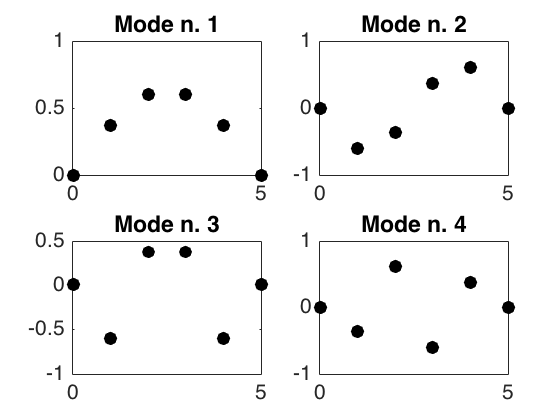

In [4]:
for II=1:4
subplot(2,2,II)
plot(0:5, V(:,II), '.k', 'markersize', 22)
title(['Mode n. ', num2str(II, '%d')])
xlim([0, 5])
end

The modes of this system look suspiciously similar to those of a linear string... Let's see what happens when we increase the number of masses.

First, however, we need a way to generalise the creation of the matrix $D$ to $N$ masses...

In [5]:
createTridiag = @(N)(full(spdiags(...
        [-ones(N,1), 2*ones(N,1), -ones(N,1)], -1:1, N, N)))

createTridiag = 

    @(N)(full(spdiags([-ones(N,1),2*ones(N,1),-ones(N,1)],-1:1,N,N)))

Then, test this function for $N = 10$.

In [6]:
N = 10;
D10 = createTridiag(N)

D10 =

     2    -1     0     0     0     0     0     0     0     0
    -1     2    -1     0     0     0     0     0     0     0
     0    -1     2    -1     0     0     0     0     0     0
     0     0    -1     2    -1     0     0     0     0     0
     0     0     0    -1     2    -1     0     0     0     0
     0     0     0     0    -1     2    -1     0     0     0
     0     0     0     0     0    -1     2    -1     0     0
     0     0     0     0     0     0    -1     2    -1     0
     0     0     0     0     0     0     0    -1     2    -1
     0     0     0     0     0     0     0     0    -1     2

### Array with 10 DOFs

Create the eigenvectors and add the fixed masses.

In [7]:
[V10,E10] = eig(D10);
V10 = [zeros(1,N); V10; zeros(1,N)];

... then plot the modes!

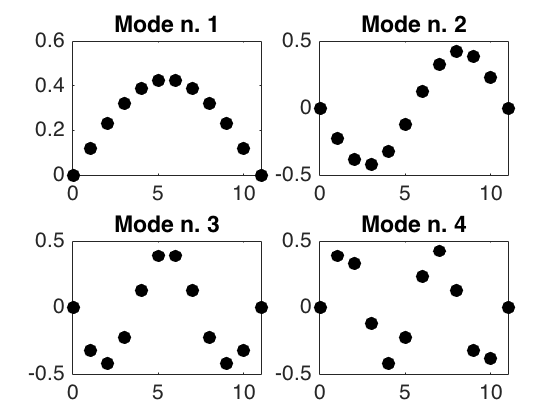

In [8]:
for II=1:4
subplot(2,2,II)
plot(0:N+1, V10(:,II), '.k', 'markersize', 22)
title(['Mode n. ', num2str(II, '%d')])
xlim([0, N+1])
end

### Array with 50 DOFs

Again, create the matrix $D$, calculate the eigenvectors and add the fixed masses.

In [9]:
N = 50;
D50 = createTridiag(N);
[V50,E50] = eig(D50);
V50 = [zeros(1,N); V50; zeros(1,N)];

... then plot the modes!

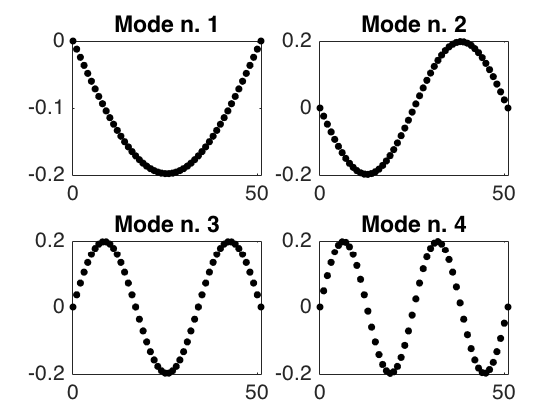

In [10]:
for II=1:4
subplot(2,2,II)
plot(0:N+1, V50(:,II), '.k', 'markersize', 20)
title(['Mode n. ', num2str(II, '%d')])
xlim([0, N+1])
end

## Results

The modal shapes of the array of masses and springs are sinusoids, similarly to what happens for the standing waves in ideal strings (see, e.g., [Wikipedia](https://en.wikipedia.org/wiki/String_vibration)).

A lengthy calculation can also be performed to check this fact. Some help on how to proceed can be found in Lecture 5 of [this course](http://www.physics.usu.edu/riffe/3750/lecture_notes.htm) on Wave Phenomena. That gives also more information on the mathematical details of this topic. 

### Important comment


For a string, the vibration is transverse to the length of the string itself. In the case of the mass-spring system, the vibrations are longitudinal, along the chain of oscillators. This can be seen in the following videos, that compare transverse and longitudinal modes for the lowest frequencies.

<video style="display:block; margin: 0 auto;" width="100%" controls loop>
  <source src="http://www.albertotorin.it/dynamics3/N15_mode1.mp4" type="video/mp4">
</video>

<video style="display:block; margin: 0 auto;" width="100%" controls loop>
  <source src="http://www.albertotorin.it/dynamics3/N15_mode2.mp4" type="video/mp4">
</video>

<video style="display:block; margin: 0 auto;" width="100%" controls loop>
  <source src="http://www.albertotorin.it/dynamics3/N15_mode3.mp4" type="video/mp4">
</video>

<video style="display:block; margin: 0 auto;" width="100%" controls loop>
  <source src="http://www.albertotorin.it/dynamics3/N15_mode4.mp4" type="video/mp4">
</video>

## Frequencies of vibration

From the eigenvalue equation $\, \Omega^2 \vec{U} = \omega^2 D \vec{U}, \,$ it is possible to write the frequencies of the MDoF system as

$$\frac{\Omega}{2\pi} = \frac{\omega}{2\pi} \sqrt{\text{eig}(D)}.$$ 

As is well known, the frequencies for the string follow the harmonic series. Hence, higher modes have frequencies that are integer multiples of the fundamental. 

What happens for the mass-spring array?

#### Find eigenvalues for N=30 and N=50

In [11]:
[V30, E30] = eig(createTridiag(30));
[V50, E50] = eig(createTridiag(50));

#### ... then normalise and sqrt

In [12]:
ev30 = diag(E30); 
ev50 = diag(E50);
y30 = sqrt(ev30/ev30(1)); 
y50 = sqrt(ev50/ev50(1));

Now, it is possible to plot the ratio $\Omega/\Omega_1$, where $\Omega_1$ is the frequency of the first mode, as a function of the mode number, and compare it with the straight line of the harmonic series of the string. 

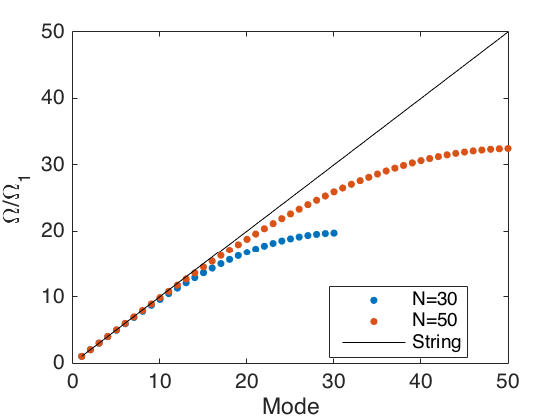

In [13]:
plot(y30,'.','markersize',20), hold on
plot(y50,'.','markersize',20), 
plot(1:50, 'k'), xlim([0, 50]), 
hold off
ylabel('\Omega/\Omega_1'), xlabel('Mode')
legend('N=30', 'N=50', 'String', 'location', 'best')

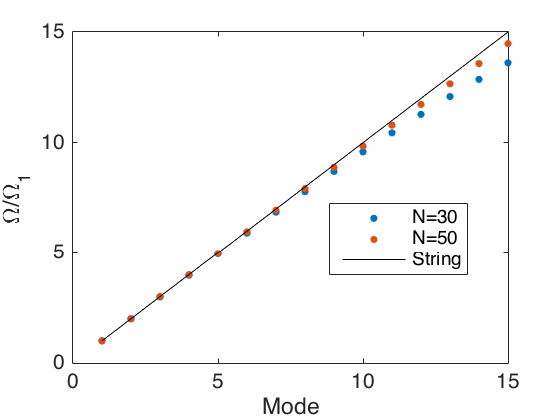

In [14]:
plot(y30,'.','markersize',20), hold on
plot(y50,'.','markersize',20), 
plot(1:50, 'k'), xlim([0, 15]), 
hold off
ylabel('\Omega/\Omega_1'), xlabel('Mode'), 
legend('N=30', 'N=50', 'String', 'location', 'best')

As is apparent, the frequencies for the MDoF system do not follow those of a string. They are close for the first modes, but get increasingly warped in the higher range. 

This fact has some deep implications in the context of finite difference simulations. As anticipated, the matrix $D$ is related to the second difference operator. When this is applied to a grid function, the simulated frequencies of the higher modes will always be lower than the theoretical ones! 

## Key points

- The modal shapes of the multiple degree-of-freedom system are the same as those of a string (sinusoidal standing waves).

- The frequencies of the oscillators are always "detuned" with respect to those of a string. The warping is almost negligible for the first modes, but becomes increasingly higher for the upper modes.
